In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("energetic_calm_data.csv")
data.head()

,name,album,artist,id,release_date,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,Pulling Me Down,Pulling Me Down,Revelries,3BfJ695pBWcdisi1TsJtQW,2021-11-26,53,162590,0.633,0.00401,0.882,0.000000,0.1440,0.372,-5.415,0.0713,123.992,7,4,energetic
1,Don't Worry,Don't Worry,Lone Tusker,5HCw4edXKPhXqh2YRAL2aC,2021-10-15,47,139484,0.680,0.13400,0.749,0.000281,0.3940,0.425,-7.248,0.0280,114.005,10,4,energetic
2,Heatwave,Heatwave,Revelries,5JHREaHmnVSbPPUxwhstVj,2021-07-16,57,161194,0.673,0.09500,0.776,0.000000,0.1970,0.532,-5.536,0.0442,124.014,4,4,energetic
3,Wade In Your Water,Summer Anthems,Common Kings,6DoYk3QIvkDs60S1d01vbx,2013-08-13,61,184013,0.598,0.26000,0.687,0.000000,0.1120,0.626,-9.021,0.0955,75.169,7,4,energetic
4,If I'm Lucky,If I'm Lucky,Jason Derulo,6eUncuJutsFi9BGO1JaBHh,2017-08-31,56,212013,0.897,0.00413,0.634,0.000000,0.0686,0.506,-6.264,0.1610,112.048,4,4,energetic


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2736 entries, 0 to 2735
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2736 non-null   object 
 1   album             2736 non-null   object 
 2   artist            2736 non-null   object 
 3   id                2736 non-null   object 
 4   release_date      2736 non-null   object 
 5   popularity        2736 non-null   int64  
 6   length            2736 non-null   int64  
 7   danceability      2736 non-null   float64
 8   acousticness      2736 non-null   float64
 9   energy            2736 non-null   float64
 10  instrumentalness  2736 non-null   float64
 11  liveness          2736 non-null   float64
 12  valence           2736 non-null   float64
 13  loudness          2736 non-null   float64
 14  speechiness       2736 non-null   float64
 15  tempo             2736 non-null   float64
 16  key               2736 non-null   int64  


In [1]:
columns = ["popularity", "length", "danceability", "acousticness", "energy", "instrumentalness", "liveness", "valence", "loudness", "speechiness", "tempo", "key", "time_signature"]
energetic_data = data.loc[data["mood"] == "energetic", :][columns].astype(float)
calm_data = data.loc[data["mood"] == "calm", :][columns].astype(float)
histogram_data = data[columns].astype(float)

NameError: name 'data' is not defined

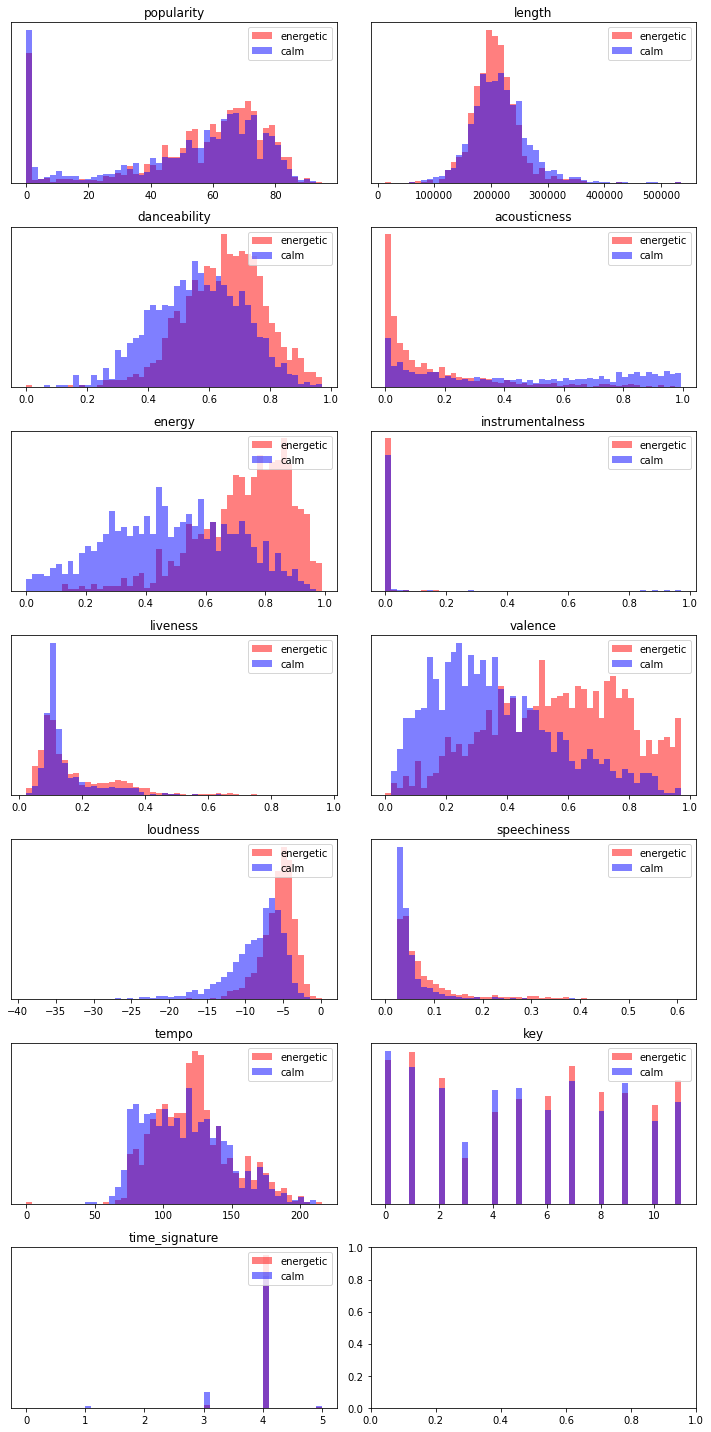

In [31]:
fig, axes = plt.subplots(7, 2, figsize=(10, 20))
ax = axes.ravel() # axes are 2-dimensional so we unfold them
for i in range(13):
    _, bins = np.histogram(histogram_data.iloc[:,i], bins=50)
    ax[i].hist(energetic_data.iloc[:,i], bins=bins, color='r', alpha=.5, label='energetic')
    ax[i].hist(calm_data.iloc[:,i], bins=bins, color='b', alpha=.5, label='calm')
    ax[i].set_title(histogram_data.columns.values[i])
    ax[i].set_yticks(()) # remove ticks on y-axis
    ax[i].legend(loc='upper right')
fig.tight_layout()

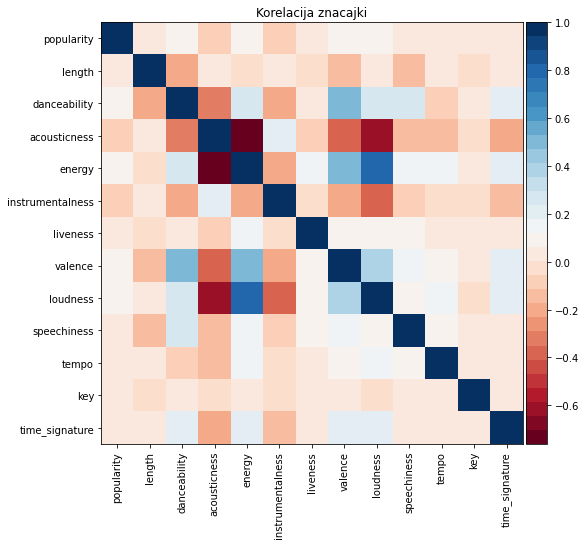

In [33]:
from matplotlib import cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

X_corr = histogram_data.corr()
cmap = cm.get_cmap('RdBu', 30)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
iax = ax.imshow(X_corr, interpolation="nearest", cmap=cmap)
ax.grid(False)
ax.set(title='Korelacija znacajki')
ax.set_xticks(range(X_corr.shape[1]))
ax.set_xticklabels(histogram_data.columns.values, rotation=90)
ax.set_yticks(range(X_corr.shape[1]))
ax.set_yticklabels(histogram_data.columns.values)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(iax,cax)

plt.show()